In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sistema inicial

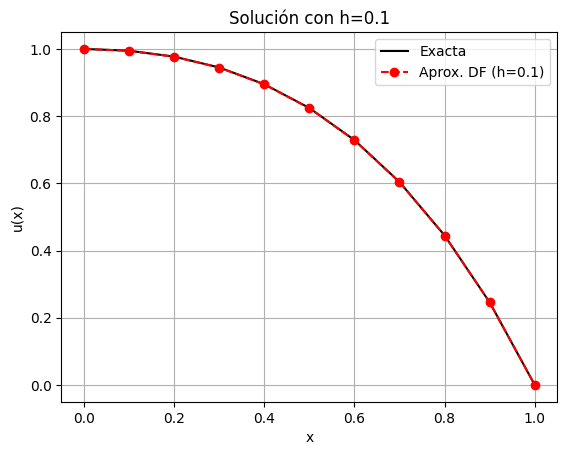

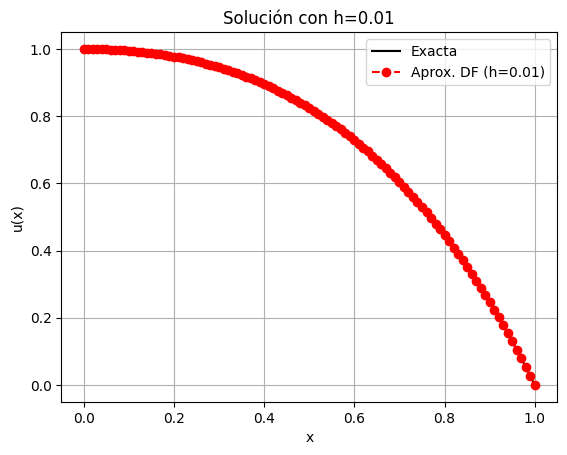

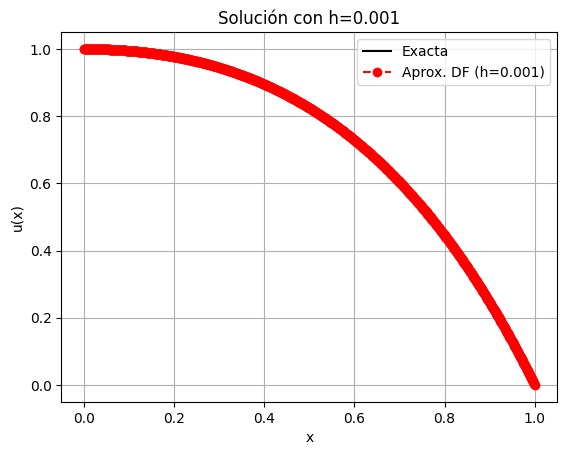

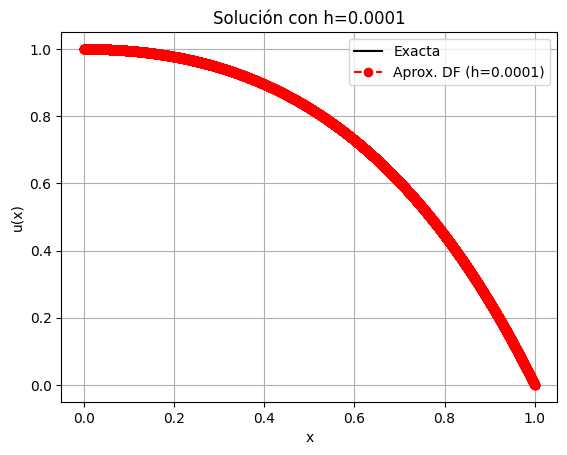

In [6]:
#Solo el sistema inicial, sin resolver a), b) o c)

def finite_diff_solution_7_No(h, a, b):
    N = int((b - a) / h)
    x = np.linspace(a, b, N + 1)

    n_unknowns = N - 1
    A = np.zeros((n_unknowns, n_unknowns))
    f = np.zeros(n_unknowns)

    for i in range(n_unknowns):
        j = i + 1  # Ajuste para indexación
        f[i] = -h**2 * (1 + 2*x[j] - x[j]**2) * np.exp(x[j])

    f[0] -= 1  # Condición de contorno u(0) = 1


    for i in range(n_unknowns):
        A[i, i] = - (2 + h**2 * x[i+1])
        if i > 0:
            A[i, i-1] = 1
        if i < n_unknowns - 1:
            A[i, i+1] = 1


    U_int = np.linalg.solve(A, f)

    u_approx = np.zeros(N+1)
    u_approx[0] = 1
    u_approx[N] = 0
    for i in range(n_unknowns):
        u_approx[i+1] = U_int[i]

    return x, u_approx

def exact_solution(x):
    return (1 - x) * np.exp(x)

h_list = [0.1, 0.01, 0.001, 0.0001]
a, b = 0, 1

for h in h_list:
    x, u_approx = finite_diff_solution_7_No(h, a, b)
    u_exact = exact_solution(x)

    plt.figure()
    plt.plot(x, u_exact, 'k-', label='Exacta')
    plt.plot(x, u_approx, 'ro--', label=f'Aprox. DF (h={h})')
    plt.title(f'Solución con h={h}')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


# Inciso a)

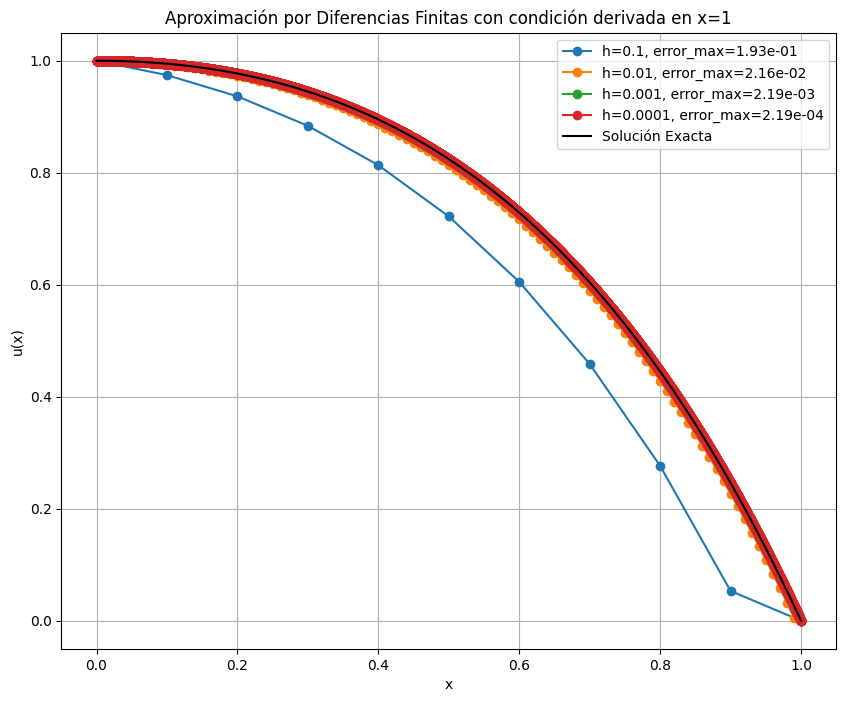

In [9]:
def finite_diff_a(h):
    N = int(1 / h)  # Número de subintervalos en [0,1]
    x = np.linspace(0, 1, N + 1)  # Nodos: x_0, x_1, ..., x_N
    n_unknowns = N - 1  # Incógnitas en los nodos internos: u_1, ..., u_{N-1}

    A = np.zeros((n_unknowns, n_unknowns))
    b = np.zeros(n_unknowns)

    # Para los nodos internos x_j, j=1,...,N-1, la ecuación diferencial se aproxima por:
    #   - (u_{j-1} - 2u_j + u_{j+1})/h^2 + x_j u_j = f(x_j),
    # con f(x) = (1+2x-x^2)e^x.
    # Reescribiendo:
    #   -1/h^2 * u_{j-1} + (2/h^2 + x_j) * u_j - 1/h^2 * u_{j+1} = f(x_j).
    for i in range(n_unknowns):
        j = i + 1  # j corresponde al nodo real: x_1, x_2, ..., x_{N-1}
        xi = x[j]
        # Término derecho de la ecuación en x_j:
        b[i] = (1 + 2 * xi - xi**2) * np.exp(xi)
        # Coeficiente central (diagonal):
        A[i, i] = 2 / h**2 + xi
        # Coeficiente para el nodo de la izquierda:
        if i == 0:
            # u(0)=1 es conocido; se traslada el término -1/h^2*u(0) al lado derecho.
            b[i] += (1 / h**2) * 1
        else:
            A[i, i - 1] = -1 / h**2
        # Coeficiente para el nodo de la derecha:
        if i < n_unknowns - 1:
            A[i, i + 1] = -1 / h**2
        else:
            # Para i == n_unknowns - 1 (último nodo interno, correspondiente a x_{N-1}=1-h)
            # no se tiene u_N en el sistema. En lugar de imponer u(1)=0 directamente,
            # se utiliza la aproximación backward para u'(1):
            #   u'(1) ≈ (u(1)-u_{N-1})/h.
            # Dado que u(1)=0, se tiene: u'(1) ≈ -u_{N-1}/h,
            # lo que implica que el término asociado a u(1) en la ecuación se traslada
            # al lado derecho como -u'(1)/h = -e/h, suponiendo u'(1)=e (según el enunciado).
            # Por ello, se ajusta b[i]:
            b[i] -= np.exp(1) / h

    # Ajuste en la última ecuación (para el nodo x_{N-1}):
    # En la ecuación original, el coeficiente central es 2/h**2 + x_{N-1}.
    # Sin embargo, al aplicar la aproximación backward para eliminar el nodo fantasma x_N=1,
    # la formulación de la última ecuación se modifica, quedando:
    #   -1/h^2 * u_{N-2} + (1/h^2 + x_{N-1}) * u_{N-1} = f(x_{N-1}) - e/h.
    # Por ello, se redefine el coeficiente de u_{N-1} (última entrada en la diagonal) como:
    A[-1, -1] = 1/h**2 + x[-2]  # x[-2] corresponde a x_{N-1} = 1 - h

    # Resolución del sistema lineal A * U_interior = b
    U_interior = np.linalg.solve(A, b)

    # Se reconstruye la solución completa, incorporando las condiciones de contorno:
    # u(0)=1 y u(1)=0
    U = np.concatenate(([1], U_interior, [0]))
    return x, U, A


def exact_solution(x):
    """Solución exacta: u(x) = (1-x)e^x"""
    return (1 - x) * np.exp(x)


# Lista de tamaños de paso a probar
hs = [0.1, 0.01, 0.001, 0.0001]

plt.figure(figsize=(10, 8))
for h in hs:
    x, U, A = finite_diff_a(h)
    U_exact = exact_solution(x)
    err_max = np.max(np.abs(U - U_exact))
    plt.plot(x, U, "o-", label=f"h={h}, error_max={err_max:.2e}")

# Graficamos también la solución exacta
x_fine = np.linspace(0, 1, 200)
plt.plot(x_fine, exact_solution(x_fine), "k-", label="Solución Exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Aproximación por Diferencias Finitas con condición derivada en x=1")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#Tablas

# Lista de tamaños de paso a probar
N = [9, 99, 999, 9999]

hs = [1/(n+1) for n in N] # expected [0.1, 0.01, 0.001, 0.0001]

DOF_list = []
h_list = []
err_inf_list = []
err_2_list = []
err_1_list = []
rate_inf_list = [None]  # El primer valor no tiene tasa
rate_2_list = [None]
rate_1_list = [None]

cond_inf_list = []
cond_2_list = []
cond_1_list = []
rate_cond_inf_list = [None]
rate_cond_2_list = [None]
rate_cond_1_list = [None]

prev_err_inf = prev_err_2 = prev_err_1 = None
prev_cond_inf = prev_cond_2 = prev_cond_1 = None
prev_h = None


for (h,n) in zip(hs,N):
    x, U, A = finite_diff_a(h)
    U_exact = exact_solution(x)
    error = np.abs(U - U_exact)
    err_inf = np.linalg.norm(error, np.inf)
    err_2 = np.linalg.norm(error, 2)
    err_1 = np.linalg.norm(error, 1)

    DOF = len(U)
    # Calcular el número de condición de la matriz A en distintas normas
    cond_inf = np.linalg.cond(A, np.inf)
    cond_2 = np.linalg.cond(A, 2)
    cond_1 = np.linalg.cond(A, 1)

    DOF_list.append(DOF)
    h_list.append(h)
    err_inf_list.append(err_inf)
    err_2_list.append(err_2)
    err_1_list.append(err_1)
    cond_inf_list.append(cond_inf)
    cond_2_list.append(cond_2)
    cond_1_list.append(cond_1)

    if prev_h is not None:
        rate_inf = np.log(err_inf / prev_err_inf) / np.log(h / prev_h)
        rate_2 = np.log(err_2 / prev_err_2) / np.log(h / prev_h)
        rate_1 = np.log(err_1 / prev_err_1) / np.log(h / prev_h)
        rate_cond_inf = np.log(cond_inf / prev_cond_inf) / np.log(h / prev_h)
        rate_cond_2 = np.log(cond_2 / prev_cond_2) / np.log(h / prev_h)
        rate_cond_1 = np.log(cond_1 / prev_cond_1) / np.log(h / prev_h)
    else:
        rate_inf = rate_2 = rate_1 = None
        rate_cond_inf = rate_cond_2 = rate_cond_1 = None

    rate_inf_list.append(rate_inf)
    rate_2_list.append(rate_2)
    rate_1_list.append(rate_1)
    rate_cond_inf_list.append(rate_cond_inf)
    rate_cond_2_list.append(rate_cond_2)
    rate_cond_1_list.append(rate_cond_1)

    prev_err_inf, prev_err_2, prev_err_1 = err_inf, err_2, err_1
    prev_cond_inf, prev_cond_2, prev_cond_1 = cond_inf, cond_2, cond_1
    prev_h = h

    err_max = np.max(np.abs(U - U_exact))

    tabla_errores = pd.DataFrame(
        {
            "DOF": DOF_list,
            "h": h_list,
            "||u_h - φ_h||∞": err_inf_list,
            "r∞(u)": rate_inf_list[1:],
            "||u_h - φ_h||₂": err_2_list,
            "r₂(u)": rate_2_list[1:],
            "||u_h - φ_h||₁": err_1_list,
            "r₁(u)": rate_1_list[1:],
        }
    )
    tabla_condicion = pd.DataFrame(
    {
        "DOF": DOF_list,
        "h": h_list,
        "cond∞(A_h)": cond_inf_list,
        "r∞": rate_cond_inf_list[1:],
        "cond₂(A_h)": cond_2_list,
        "r₂": rate_cond_2_list[1:],
        "cond₁(A_h)": cond_1_list,
        "r₁": rate_cond_1_list[1:],
    }
)

In [12]:
tabla_errores

,DOF,h,||u_h - φ_h||∞,r∞(u),||u_h - φ_h||₂,r₂(u),||u_h - φ_h||₁,r₁(u)
0,11,0.1000,0.192862,NaN,0.353760,NaN,0.937193,NaN
1,101,0.0100,0.021627,0.950252,0.120498,0.467730,1.032367,-0.042005
2,1001,0.0010,0.002187,0.995179,0.038372,0.496963,1.041765,-0.003936
3,10001,0.0001,0.000219,0.999519,0.012143,0.499698,1.042703,-0.000391


In [13]:
tabla_condicion

,DOF,h,cond∞(A_h),r∞,cond₂(A_h),r₂,cond₁(A_h),r₁
0,11,0.1000,1.431983e+02,NaN,1.148487e+02,NaN,1.431983e+02,NaN
1,101,0.0100,1.524557e+04,-2.027206,1.253912e+04,-2.038141,1.524557e+04,-2.027206
2,1001,0.0010,1.533517e+06,-2.002545,1.261805e+06,-2.002725,1.533517e+06,-2.002545
3,10001,0.0001,1.534410e+08,-2.000253,1.262569e+08,-2.000263,1.534410e+08,-2.000253


# Inciso b)

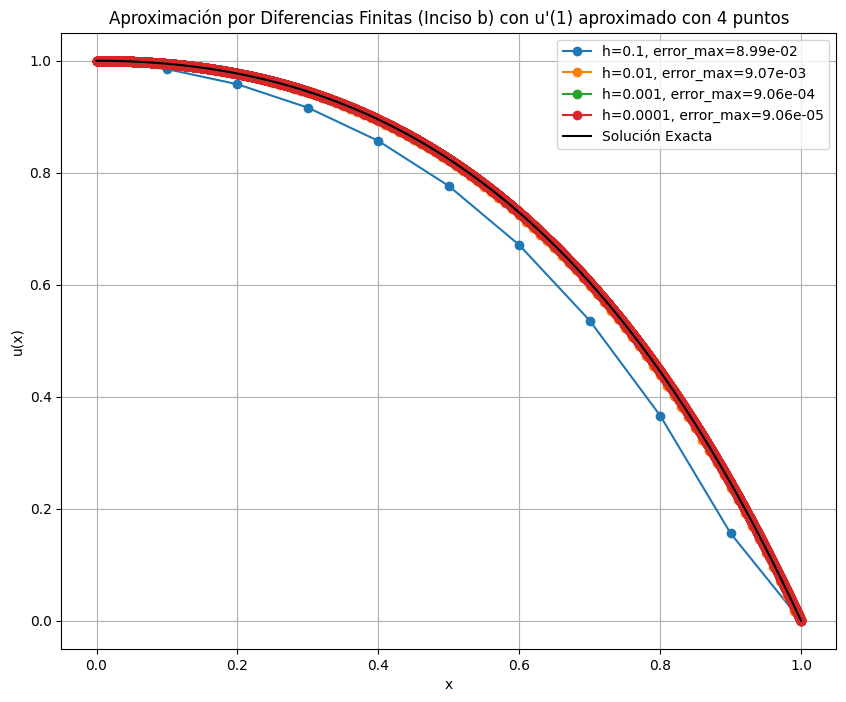

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def finite_diff_b(h):
    N = int(1 / h)  # Número de subintervalos en [0,1]
    x = np.linspace(0, 1, N + 1)  # Nodos: x_0, x_1, ..., x_N
    n_unknowns = N - 1  # Incógnitas: u_1, u_2, ..., u_{N-1}
    
    # Se arma la matriz A y el vector b para el sistema en los nodos internos
    A = np.zeros((n_unknowns, n_unknowns))
    b = np.zeros(n_unknowns)
    
    # Para los nodos j=1,...,N-1 se usa la aproximación centrada para u'':
    #   - (u_{j-1} - 2u_j + u_{j+1})/h^2 + x_j u_j = (1+2x_j-x_j^2)e^(x_j)
    for i in range(n_unknowns):
        j = i + 1  # j corresponde al nodo real x_j
        xi = x[j]
        b[i] = (1 + 2 * xi - xi**2) * np.exp(xi)
        A[i, i] = 2 / h**2 + xi
        # Nodo izquierdo: u_{j-1}
        if i == 0:
            # u(0)=1 es conocida; se traslada (-1/h^2)*u(0) al lado derecho
            b[i] += (1 / h**2) * 1
        else:
            A[i, i - 1] = -1 / h**2
        # Nodo derecho: u_{j+1}
        # Para j=1,...,N-2 se usa el coeficiente habitual; para el último nodo interno,
        # se dejará que la modificación posterior lo ajuste para incorporar la condición derivada.
        if i < n_unknowns - 1:
            A[i, i + 1] = -1 / h**2

    # En el último nodo interno, correspondiente a x_{N-1} = 1-h, en lugar de la discretización
    # estándar se impone la condición derivada (usando la fórmula de 4 puntos y u(1)=0) que,
    # tras la eliminación del nodo fantasma, conduce a:
    #
    #   - (2/h^2) * U_{N-2} + (5/h^2 + x_{N-1}) * U_{N-1} = (1+2x_{N-1}-x_{N-1}^2)e^(x_{N-1}).
    A[-1, -2] = -2 / h**2
    A[-1, -1] = 5 / h**2 + x[-2]  # x[-2] es el penúltimo nodo, es decir, x_{N-1}=1-h
    b[-1] = (1 + 2 * x[-2] - x[-2]**2) * np.exp(x[-2])
    
    # Se resuelve el sistema lineal A * U_interior = b
    U_interior = np.linalg.solve(A, b)
    
    # Se reconstruye la solución completa, incorporando las condiciones de contorno:
    U = np.concatenate(([1], U_interior, [0]))
    return x, U, A

def exact_solution(x):
    """Solución exacta: u(x) = (1-x)e^x"""
    return (1 - x) * np.exp(x)

hs = [0.1, 0.01, 0.001, 0.0001]
plt.figure(figsize=(10, 8))
for h in hs:
    x, U, A = finite_diff_b(h)
    U_exact = exact_solution(x)
    err_max = np.max(np.abs(U - U_exact))
    plt.plot(x, U, "o-", label=f"h={h}, error_max={err_max:.2e}")

# Graficamos también la solución exacta
x_fine = np.linspace(0, 1, 200)
plt.plot(x_fine, exact_solution(x_fine), "k-", label="Solución Exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Aproximación por Diferencias Finitas (Inciso b) con u'(1) aproximado con 4 puntos")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#Tablas

# Lista de tamaños de paso a probar
N = [9, 99, 999, 9999]

hs = [1/(n+1) for n in N] # expected [0.1, 0.01, 0.001, 0.0001]

DOF_list = []
h_list = []
err_inf_list = []
err_2_list = []
err_1_list = []
rate_inf_list = [None]  # El primer valor no tiene tasa
rate_2_list = [None]
rate_1_list = [None]

cond_inf_list = []
cond_2_list = []
cond_1_list = []
rate_cond_inf_list = [None]
rate_cond_2_list = [None]
rate_cond_1_list = [None]

prev_err_inf = prev_err_2 = prev_err_1 = None
prev_cond_inf = prev_cond_2 = prev_cond_1 = None
prev_h = None


for (h,n) in zip(hs,N):
    x, U, A = finite_diff_b(h)
    U_exact = exact_solution(x)
    error = np.abs(U - U_exact)
    err_inf = np.linalg.norm(error, np.inf)
    err_2 = np.linalg.norm(error, 2)
    err_1 = np.linalg.norm(error, 1)

    DOF = len(U)
    # Calcular el número de condición de la matriz A en distintas normas
    cond_inf = np.linalg.cond(A, np.inf)
    cond_2 = np.linalg.cond(A, 2)
    cond_1 = np.linalg.cond(A, 1)

    DOF_list.append(DOF)
    h_list.append(h)
    err_inf_list.append(err_inf)
    err_2_list.append(err_2)
    err_1_list.append(err_1)
    cond_inf_list.append(cond_inf)
    cond_2_list.append(cond_2)
    cond_1_list.append(cond_1)

    if prev_h is not None:
        rate_inf = np.log(err_inf / prev_err_inf) / np.log(h / prev_h)
        rate_2 = np.log(err_2 / prev_err_2) / np.log(h / prev_h)
        rate_1 = np.log(err_1 / prev_err_1) / np.log(h / prev_h)
        rate_cond_inf = np.log(cond_inf / prev_cond_inf) / np.log(h / prev_h)
        rate_cond_2 = np.log(cond_2 / prev_cond_2) / np.log(h / prev_h)
        rate_cond_1 = np.log(cond_1 / prev_cond_1) / np.log(h / prev_h)
    else:
        rate_inf = rate_2 = rate_1 = None
        rate_cond_inf = rate_cond_2 = rate_cond_1 = None

    rate_inf_list.append(rate_inf)
    rate_2_list.append(rate_2)
    rate_1_list.append(rate_1)
    rate_cond_inf_list.append(rate_cond_inf)
    rate_cond_2_list.append(rate_cond_2)
    rate_cond_1_list.append(rate_cond_1)

    prev_err_inf, prev_err_2, prev_err_1 = err_inf, err_2, err_1
    prev_cond_inf, prev_cond_2, prev_cond_1 = cond_inf, cond_2, cond_1
    prev_h = h

    err_max = np.max(np.abs(U - U_exact))

    tabla_errores = pd.DataFrame(
        {
            "DOF": DOF_list,
            "h": h_list,
            "||u_h - φ_h||∞": err_inf_list,
            "r∞(u)": rate_inf_list[1:],
            "||u_h - φ_h||₂": err_2_list,
            "r₂(u)": rate_2_list[1:],
            "||u_h - φ_h||₁": err_1_list,
            "r₁(u)": rate_1_list[1:],
        }
    )
    tabla_condicion = pd.DataFrame(
    {
        "DOF": DOF_list,
        "h": h_list,
        "cond∞(A_h)": cond_inf_list,
        "r∞": rate_cond_inf_list[1:],
        "cond₂(A_h)": cond_2_list,
        "r₂": rate_cond_2_list[1:],
        "cond₁(A_h)": cond_1_list,
        "r₁": rate_cond_1_list[1:],
    }
)

In [17]:
tabla_errores

,DOF,h,||u_h - φ_h||∞,r∞(u),||u_h - φ_h||₂,r₂(u),||u_h - φ_h||₁,r₁(u)
0,11,0.1000,0.089898,NaN,0.165287,NaN,0.438285,NaN
1,101,0.0100,0.009074,0.995949,0.050577,0.514285,0.433375,0.004893
2,1001,0.0010,0.000906,1.000555,0.015902,0.502490,0.431742,0.001639
3,10001,0.0001,0.000091,1.000066,0.005026,0.500261,0.431567,0.000177


In [18]:
tabla_condicion

,DOF,h,cond∞(A_h),r∞,cond₂(A_h),r₂,cond₁(A_h),r₁
0,11,0.1000,7.730257e+01,NaN,5.200058e+01,NaN,6.724769e+01,NaN
1,101,0.0100,8.264720e+03,-2.029034,5.466632e+03,-2.021712,7.084978e+03,-2.022661
2,1001,0.0010,8.312232e+05,-2.002489,5.496715e+05,-2.002383,7.124780e+05,-2.002433
3,10001,0.0001,8.316860e+07,-2.000242,5.499772e+07,-2.000241,7.128737e+07,-2.000241
